### [Case: hospital districts](https://autogis-site.readthedocs.io/en/latest/notebooks/L4/create_health_district_polygons.html)

In [1]:
import json
import numpy as np
import pandas as pd
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt

In [2]:
# For available features, see http://geo.stat.fi/geoserver/tilastointialueet/wfs?request=GetCapabilities
url = "http://geo.stat.fi/geoserver/tilastointialueet/wfs?request=GetFeature&typename=tilastointialueet:kunta1000k&outputformat=JSON"
geodata = gpd.read_file(url)

In [3]:
geodata.head()

,id,kunta,vuosi,nimi,namn,name,geometry
0,kunta1000k.1,005,2022,Alajärvi,Alajärvi,Alajärvi,"POLYGON ((366787.924 7001300.583, 364487.590 6..."
1,kunta1000k.2,009,2022,Alavieska,Alavieska,Alavieska,"POLYGON ((382543.364 7120022.976, 382899.505 7..."
2,kunta1000k.3,010,2022,Alavus,Alavo,Alavus,"POLYGON ((343298.204 6961570.195, 343831.847 6..."
3,kunta1000k.4,016,2022,Asikkala,Asikkala,Asikkala,"POLYGON ((436139.680 6798279.085, 435714.468 6..."
4,kunta1000k.5,018,2022,Askola,Askola,Askola,"POLYGON ((426631.036 6720528.076, 428821.749 6..."


In [4]:
len(geodata)

309

In [5]:
geodata.rename(columns={'kunta': 'code'}, inplace=True)
geodata = geodata[['code', 'name', 'geometry']]

In [6]:
geodata.head()

,code,name,geometry
0,005,Alajärvi,"POLYGON ((366787.924 7001300.583, 364487.590 6..."
1,009,Alavieska,"POLYGON ((382543.364 7120022.976, 382899.505 7..."
2,010,Alavus,"POLYGON ((343298.204 6961570.195, 343831.847 6..."
3,016,Asikkala,"POLYGON ((436139.680 6798279.085, 435714.468 6..."
4,018,Askola,"POLYGON ((426631.036 6720528.076, 428821.749 6..."


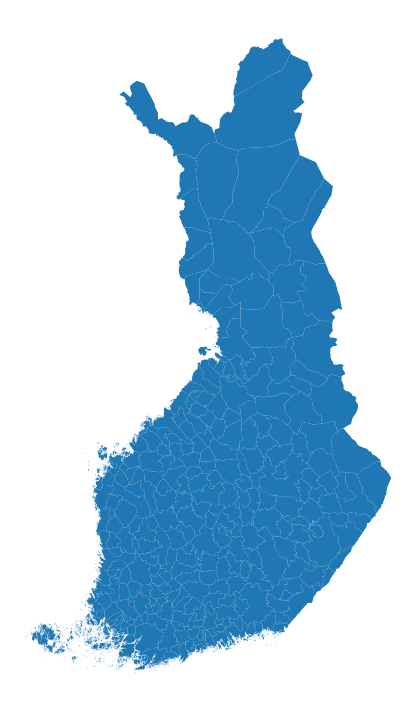

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
geodata.plot(ax=ax)
plt.axis('off')
plt.tight_layout()

In [8]:
geodata.dtypes

code          object
name          object
geometry    geometry
dtype: object

- read excel data containing hospital districts finland

In [11]:
hospital_data = pd.read_excel(r'data/Shp_jäsenkunnat_2020.xls', sheet_name='kunnat_shp_2020_ aakkosjärj.', header=3)

In [13]:
hospital_data.head()

,kunta-\nkoodi,kunta,shp:n koodi,sairaanhoitopiiri,erva-alue,kuntien lkm
0,NaN,NaN,NaN,NaN,NaN,NaN
1,20.0,Akaa,6.0,Pirkanmaa,TAYS,1.0
2,5.0,Alajärvi,15.0,Etelä-Pohjanmaa,TAYS,2.0
3,9.0,Alavieska,18.0,Pohjois-Pohjanmaa,OYS,3.0
4,10.0,Alavus,15.0,Etelä-Pohjanmaa,TAYS,4.0


In [14]:
len(hospital_data)

295

In [17]:
hospital_data.drop(0, inplace=True)

In [18]:
hospital_data.head()

,kunta-\nkoodi,kunta,shp:n koodi,sairaanhoitopiiri,erva-alue,kuntien lkm
1,20.0,Akaa,6.0,Pirkanmaa,TAYS,1.0
2,5.0,Alajärvi,15.0,Etelä-Pohjanmaa,TAYS,2.0
3,9.0,Alavieska,18.0,Pohjois-Pohjanmaa,OYS,3.0
4,10.0,Alavus,15.0,Etelä-Pohjanmaa,TAYS,4.0
5,16.0,Asikkala,7.0,Päijät-Häme,HYKS,5.0


In [19]:
hospital_data.reset_index(drop=True, inplace=True)
hospital_data.head()

,kunta-\nkoodi,kunta,shp:n koodi,sairaanhoitopiiri,erva-alue,kuntien lkm
0,20.0,Akaa,6.0,Pirkanmaa,TAYS,1.0
1,5.0,Alajärvi,15.0,Etelä-Pohjanmaa,TAYS,2.0
2,9.0,Alavieska,18.0,Pohjois-Pohjanmaa,OYS,3.0
3,10.0,Alavus,15.0,Etelä-Pohjanmaa,TAYS,4.0
4,16.0,Asikkala,7.0,Päijät-Häme,HYKS,5.0


In [21]:
hospital_data.rename(columns={'kunta-\nkoodi': 'code', 'sairaanhoitopiiri': 'healthCareDistrict'}, inplace=True)
hospital_data.head()

,code,kunta,shp:n koodi,healthCareDistrict,erva-alue,kuntien lkm
0,20.0,Akaa,6.0,Pirkanmaa,TAYS,1.0
1,5.0,Alajärvi,15.0,Etelä-Pohjanmaa,TAYS,2.0
2,9.0,Alavieska,18.0,Pohjois-Pohjanmaa,OYS,3.0
3,10.0,Alavus,15.0,Etelä-Pohjanmaa,TAYS,4.0
4,16.0,Asikkala,7.0,Päijät-Häme,HYKS,5.0


In [22]:
hospital_data = hospital_data[['code', 'healthCareDistrict']]
hospital_data.head()

,code,healthCareDistrict
0,20.0,Pirkanmaa
1,5.0,Etelä-Pohjanmaa
2,9.0,Pohjois-Pohjanmaa
3,10.0,Etelä-Pohjanmaa
4,16.0,Päijät-Häme


In [23]:
len(hospital_data)

294

In [25]:
hospital_data.dtypes

code                  float64
healthCareDistrict     object
dtype: object

- convert the code data type to `str` and `zfill` to 3 characters

In [26]:
hospital_data['code'] = hospital_data['code'].astype(int).astype('str')
hospital_data['code'] = hospital_data['code'].str.zfill(3)
hospital_data.head()

C:\Users\big yeti\AppData\Local\Temp\ipykernel_6672\726556260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_data['code'] = hospital_data['code'].astype(int).astype('str')
C:\Users\big yeti\AppData\Local\Temp\ipykernel_6672\726556260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospital_data['code'] = hospital_data['code'].str.zfill(3)


,code,healthCareDistrict
0,020,Pirkanmaa
1,005,Etelä-Pohjanmaa
2,009,Pohjois-Pohjanmaa
3,010,Etelä-Pohjanmaa
4,016,Päijät-Häme


- merge health district info to the municipality

In [29]:
geodata = geodata.merge(hospital_data, on='code', how='left')
geodata

,code,name,geometry,healthCareDistrict
0,005,Alajärvi,"POLYGON ((366787.924 7001300.583, 364487.590 6...",Etelä-Pohjanmaa
1,009,Alavieska,"POLYGON ((382543.364 7120022.976, 382899.505 7...",Pohjois-Pohjanmaa
2,010,Alavus,"POLYGON ((343298.204 6961570.195, 343831.847 6...",Etelä-Pohjanmaa
3,016,Asikkala,"POLYGON ((436139.680 6798279.085, 435714.468 6...",Päijät-Häme
4,018,Askola,"POLYGON ((426631.036 6720528.076, 428821.749 6...",HUS
...,...,...,...,...
304,977,Ylivieska,"POLYGON ((398010.991 7110887.267, 399696.069 7...",Pohjois-Pohjanmaa
305,980,Ylöjärvi,"POLYGON ((313738.511 6896936.100, 319421.316 6...",Pirkanmaa
306,981,Ypäjä,"POLYGON ((297451.456 6756204.328, 297931.884 6...",Kanta-Häme
307,989,Ähtäri,"POLYGON ((348733.187 6959704.551, 349457.337 6...",Etelä-Pohjanmaa


In [30]:
# List all municipalities that lack health district info:
geodata[geodata["healthCareDistrict"].isnull()].name

7          Brändö
8          Eckerö
15       Finström
17          Föglö
18           Geta
24     Hammarland
57         Jomala
111      Kumlinge
121         Kökar
134       Lemland
147    Lumparland
153     Mariehamn
236       Saltvik
254      Sottunga
256          Sund
301         Vårdö
Name: name, dtype: object

In [31]:
# Update "Ahvenanmaa" as the health care district for Åland municipalities (16 municipalities in total)
geodata.loc[geodata["healthCareDistrict"].isnull(), "healthCareDistrict"] = "Ahvenanmaa"

- Check the count of municipalities per health care disctrict

In [32]:
geodata['healthCareDistrict'].value_counts()

Pohjois-Pohjanmaa    29
Varsinais-Suomi      28
HUS                  24
Pirkanmaa            23
Keski-Suomi          21
Etelä-Pohjanmaa      18
Pohjois-Savo         18
Ahvenanmaa           16
Satakunta            16
Lappi                15
Vaasa                13
Pohjois-Karjala      13
Päijät-Häme          12
Kanta-Häme           11
Keski-Pohjanmaa      10
Etelä-Savo            9
Etelä-Karjala         9
Kainuu                8
Kymenlaakso           6
Länsi-Pohja           6
Itä-Savo              4
Name: healthCareDistrict, dtype: int64

#### create polygons for health care districts

In [33]:
# Dissolve (=combine) municipality polygon geometries for each health care district
districts = geodata.dissolve(by='healthCareDistrict')

In [34]:
districts.reset_index(inplace=True)

In [35]:
districts.head()

,healthCareDistrict,geometry,code,name
0,Ahvenanmaa,"MULTIPOLYGON (((173277.623 6640282.925, 173136...",035,Brändö
1,Etelä-Karjala,"POLYGON ((595843.841 6772915.996, 592557.900 6...",153,Imatra
2,Etelä-Pohjanmaa,"POLYGON ((249539.259 6894974.367, 244232.829 6...",005,Alajärvi
3,Etelä-Savo,"POLYGON ((596327.952 6823806.064, 596718.363 6...",097,Hirvensalmi
4,HUS,"MULTIPOLYGON (((272609.681 6632304.439, 272418...",018,Askola


In [36]:
districts = districts[['healthCareDistrict', 'geometry']]
districts

,healthCareDistrict,geometry
0,Ahvenanmaa,"MULTIPOLYGON (((173277.623 6640282.925, 173136..."
1,Etelä-Karjala,"POLYGON ((595843.841 6772915.996, 592557.900 6..."
2,Etelä-Pohjanmaa,"POLYGON ((249539.259 6894974.367, 244232.829 6..."
3,Etelä-Savo,"POLYGON ((596327.952 6823806.064, 596718.363 6..."
4,HUS,"MULTIPOLYGON (((272609.681 6632304.439, 272418..."
5,Itä-Savo,"POLYGON ((572240.425 6898837.522, 576521.513 6..."
6,Kainuu,"POLYGON ((606127.874 7081796.115, 603849.594 7..."
7,Kanta-Häme,"POLYGON ((393094.362 6756355.692, 394102.316 6..."
8,Keski-Pohjanmaa,"MULTIPOLYGON (((302835.219 7083897.220, 302801..."
9,Keski-Suomi,"POLYGON ((439110.805 6852598.036, 439300.113 6..."


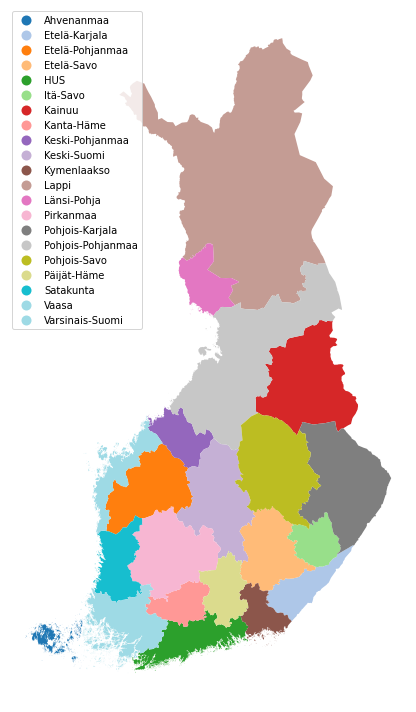

In [56]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.axis('off')
plt.tight_layout()
districts.plot(ax=ax, column='healthCareDistrict', cmap='tab20', k=20, legend=True,
              legend_kwds={'loc': "upper left"})
plt.savefig("healthDistricts.svg", format="svg")

- save plots as svgs

In [54]:
# Write GeoJSON in original projection
districts.to_file("data/healthDistrictsEPSG3067.geojson", driver='GeoJSON', encoding='utf-8')

In [55]:
# Re-project to WGS84 and save again
wgs84 = CRS.from_epsg(4326)
districts.to_crs(wgs84).to_file("data/healthDistrictsEPSG4326.geojson", driver='GeoJSON', encoding='utf-8')